<a href="https://colab.research.google.com/github/snsamarasekara/Data-Analysis-Projects/blob/main/MRIBrain_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
zf = "/content/archive copy 2.zip"
target_dir = "/content/dataset/BrainMRI3"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
#Define Directories for train, test & Validation Set

train_path = "/content/dataset/BrainMRI3/archive copy/Training"
test_path ="/content/dataset/BrainMRI3/archive copy/Testing"

#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16 
#The dimension of the images we are going to define is 500x500 img_height = 500
img_width = 500

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
img_height = 500
img_width = 500

train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False, 
 
      class_mode='binary',
      batch_size=batch_size
      )


Found 2916 images belonging to 2 classes.
Found 705 images belonging to 2 classes.


<function matplotlib.pyplot.show(*args, **kw)>

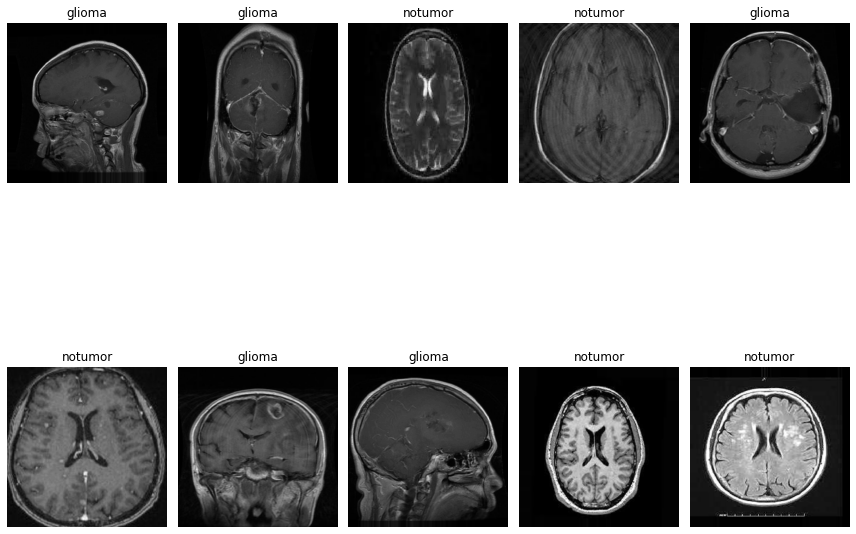

In [ ]:
plt.figure(figsize=(12, 12)) 
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'glioma', 1:'notumor'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),'gray')
        break
plt.tight_layout()
plt.show

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))
#keras.losses.SparseCategoricalCrossentropy(from_logits = True)
#model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/dataset/BrainMRI3/archive copy/Training",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/dataset/BrainMRI3/archive copy/Testing", target_size=(224,224))

Found 2916 images belonging to 2 classes.
Found 705 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=20,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

<ipython-input-11-2cd76c319a26>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=20,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])


Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 166.1060 - accuracy: 0.5719

20/20 [==============================] - 25s 515ms/step - loss: 166.1060 - accuracy: 0.5719 - val_loss: 0.6996 - val_accuracy: 0.4406
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6687 - accuracy: 0.5312

20/20 [==============================] - 10s 498ms/step - loss: 0.6687 - accuracy: 0.5312 - val_loss: 0.6345 - val_accuracy: 0.5719
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.4703 - accuracy: 0.7344

20/20 [==============================] - 10s 502ms/step - loss: 0.4703 - accuracy: 0.7344 - val_loss: 0.3043 - val_accuracy: 0.8938
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.8763 - accuracy: 0.7812

20/20 [==============================] - 10s 507ms/step - loss: 0.8763 - accuracy: 0.7812 - val_loss: 0.4609 - val_accuracy: 0.7812
Epoch 5/10
20/20 [==============================] - ETA: 0s - loss: 0.5028 - accuracy: 0.8250

20/20 [==============================] - 10s 510ms/step - loss: 0.5028 - accuracy: 0.8250 - val_loss: 0.2254 - val_accuracy: 0.9125
Epoch 6/10
20/20 [==============================] - ETA: 0s - loss: 0.3497 - accuracy: 0.8594

20/20 [==============================] - 10s 514ms/step - loss: 0.3497 - accuracy: 0.8594 - val_loss: 0.2057 - val_accuracy: 0.9156
Epoch 7/10
20/20 [==============================] - ETA: 0s - loss: 0.1671 - accuracy: 0.9406

20/20 [==============================] - 10s 516ms/step - loss: 0.1671 - accuracy: 0.9406 - val_loss: 0.1901 - val_accuracy: 0.9375
Epoch 8/10
20/20 [==============================] - ETA: 0s - loss: 0.1560 - accuracy: 0.9344

20/20 [==============================] - 10s 521ms/step - loss: 0.1560 - accuracy: 0.9344 - val_loss: 0.1539 - val_accuracy: 0.9469
Epoch 9/10
20/20 [==============================] - ETA: 0s - loss: 0.0755 - accuracy: 0.9797

20/20 [==============================] - 11s 529ms/step - loss: 0.0755 - accuracy: 0.9797 - val_loss: 0.1432 - val_accuracy: 0.9594
Epoch 10/10
20/20 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9859

20/20 [==============================] - 10s 519ms/step - loss: 0.0621 - accuracy: 0.9859 - val_loss: 0.1153 - val_accuracy: 0.9469
